# Decodificação simples por substituição de letras

A decodificação do código de substituição segue o mesmo princípio da codificação com a única diferençã de que invertemos quem é a chave e quem é o valor no nosso dicionário `codigo`.

Mas vamos deixar as coisas mais interessantes. Suponham que não conhecemos o código. Como poderíamos decodificar a mensagem?

Uma possível maneira de tentar adivinhar o código é via análise estatítica da distribuição de letras na mensagem codificada, comparada com a distribuição de letras na língua portuguesa.

A ideia básica é "se a letra "A" aparece com frequência na língua portuguesa, então a sua letra correspondente no nosso código de substituição vai aparecer com frequência. Usando essa informação como guia e através de um processo de tentativa e erro podemos tentar adivinhar o código e então decodificar a mensagem original.

Para isso precisamos primeiro das probabilidades de cada letra, o que podemos inferir através de algum outro texto (suficientemente longo) na mesma língua.

In [182]:
import string

letras = list(string.ascii_lowercase)

# Vamos utilizar um dicionário para contar quantas vezes cada letra aparece
histogram = {letra:0 for letra in letras}
print(histogram)

{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0}


Vamos ler uma mensagem conhecida em português para inferir as probbilidades

In [183]:
with open("pai-contra-mae-machado-de-assis.txt") as fid:
    texto_conhecido = fid.read()
    
print(texto_conhecido[1000:1500])

era o ferro ao pescoço, outro o ferro ao pé; havia também a máscara de folha-deflandres. A máscara fazia perder o vício da embriaguez aos escravos, por lhes tapar a
boca. Tinha só três buracos, dous para ver, um para respirar, e era fechada atrás da
cabeça por um cadeado. Com o vício de beber. perdiam a tentação de furtar, porque
geralmente era dos vinténs do senhor que eles tiravam com que matar a sede, e aí
ficavam dous pecados extintos, e a sobriedade e a honestidade certas. Era grotesca tal



Agora podemos computar quantas vezes cada letra aparece.

In [184]:
# Usamos lower para contar letras maiúsculas e minúsculas juntas
for l in texto_conhecido.lower():
    if l in histogram:  # Apenas conta letras já no dicionário -> vamos ignorar outros caracteres
        histogram[l] += 1

In [185]:
print(histogram)

{'a': 2511, 'b': 152, 'c': 639, 'd': 880, 'e': 2086, 'f': 229, 'g': 246, 'h': 238, 'i': 1048, 'j': 63, 'k': 1, 'l': 467, 'm': 844, 'n': 843, 'o': 1768, 'p': 423, 'q': 239, 'r': 1221, 's': 1268, 't': 680, 'u': 831, 'v': 350, 'w': 6, 'x': 34, 'y': 0, 'z': 76}


<IPython.core.display.Javascript object>


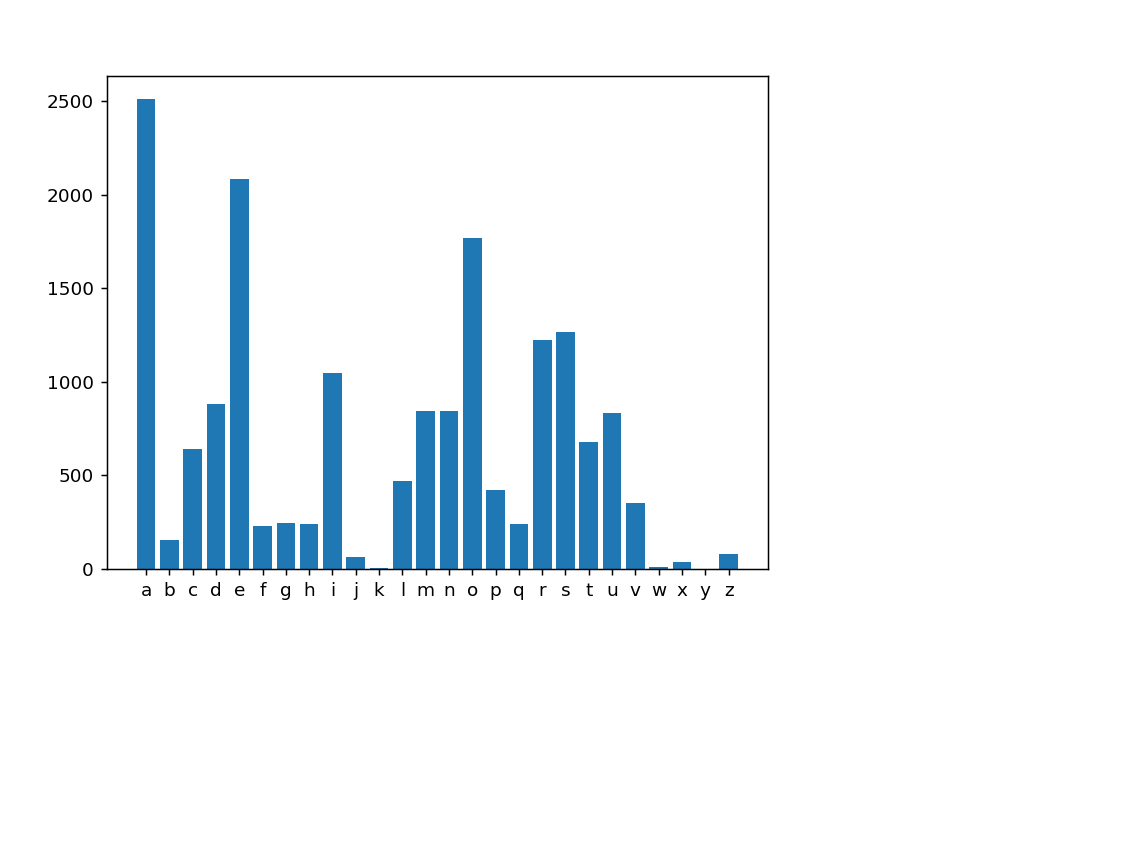

In [186]:
%matplotlib notebook

# Com a biblioteca matplotlib podemos fazer diversos tipos de plot
from matplotlib import pyplot as plt

# Cria uma lista com as contagens de cada letra em ordem
x = [histogram[i] for i in letras]

plt.figure()
plt.bar(letras, x)
plt.show()

Talvez seja melhor plotar com as letras ordenadas pela frequência em que aparecem.

Primeiro agrupamos as letras e o número de vezes que elas aparecem.
**Isso nos dá uma lista de tuplas**.

In [187]:
grupos = list(zip(letras, x))
print(grupos)

[('a', 2511), ('b', 152), ('c', 639), ('d', 880), ('e', 2086), ('f', 229), ('g', 246), ('h', 238), ('i', 1048), ('j', 63), ('k', 1), ('l', 467), ('m', 844), ('n', 843), ('o', 1768), ('p', 423), ('q', 239), ('r', 1221), ('s', 1268), ('t', 680), ('u', 831), ('v', 350), ('w', 6), ('x', 34), ('y', 0), ('z', 76)]


Agora usamos a função sorted do Python para ordenar a lista.

In [188]:
# Apenas chamado sorted vai ordenar utilizando o primeiro valor em cada tupla -> Vai ordenar em ordem alfabética
grupos_ordenados = sorted(grupos)
print(sorted(grupos_ordenados))

[('a', 2511), ('b', 152), ('c', 639), ('d', 880), ('e', 2086), ('f', 229), ('g', 246), ('h', 238), ('i', 1048), ('j', 63), ('k', 1), ('l', 467), ('m', 844), ('n', 843), ('o', 1768), ('p', 423), ('q', 239), ('r', 1221), ('s', 1268), ('t', 680), ('u', 831), ('v', 350), ('w', 6), ('x', 34), ('y', 0), ('z', 76)]


Não é bem o que queríamos. **Precisamos informar que a ordenação deve utilizar o segundo elemento de cada tupla**.

In [189]:
grupos_ordenados = sorted(grupos, key=lambda x: x[1])
print(grupos_ordenados)

[('y', 0), ('k', 1), ('w', 6), ('x', 34), ('j', 63), ('z', 76), ('b', 152), ('f', 229), ('h', 238), ('q', 239), ('g', 246), ('v', 350), ('p', 423), ('l', 467), ('c', 639), ('t', 680), ('u', 831), ('n', 843), ('m', 844), ('d', 880), ('i', 1048), ('r', 1221), ('s', 1268), ('o', 1768), ('e', 2086), ('a', 2511)]


Vamos inverter a ordem.

In [190]:
grupos_ordenados = list(reversed(grupos_ordenados))

print(grupos_ordenados)

[('a', 2511), ('e', 2086), ('o', 1768), ('s', 1268), ('r', 1221), ('i', 1048), ('d', 880), ('m', 844), ('n', 843), ('u', 831), ('t', 680), ('c', 639), ('l', 467), ('p', 423), ('v', 350), ('g', 246), ('q', 239), ('h', 238), ('f', 229), ('b', 152), ('z', 76), ('j', 63), ('x', 34), ('w', 6), ('k', 1), ('y', 0)]


 Agora vamos separar em duas listas para podermos plotar facilmente.

<IPython.core.display.Javascript object>


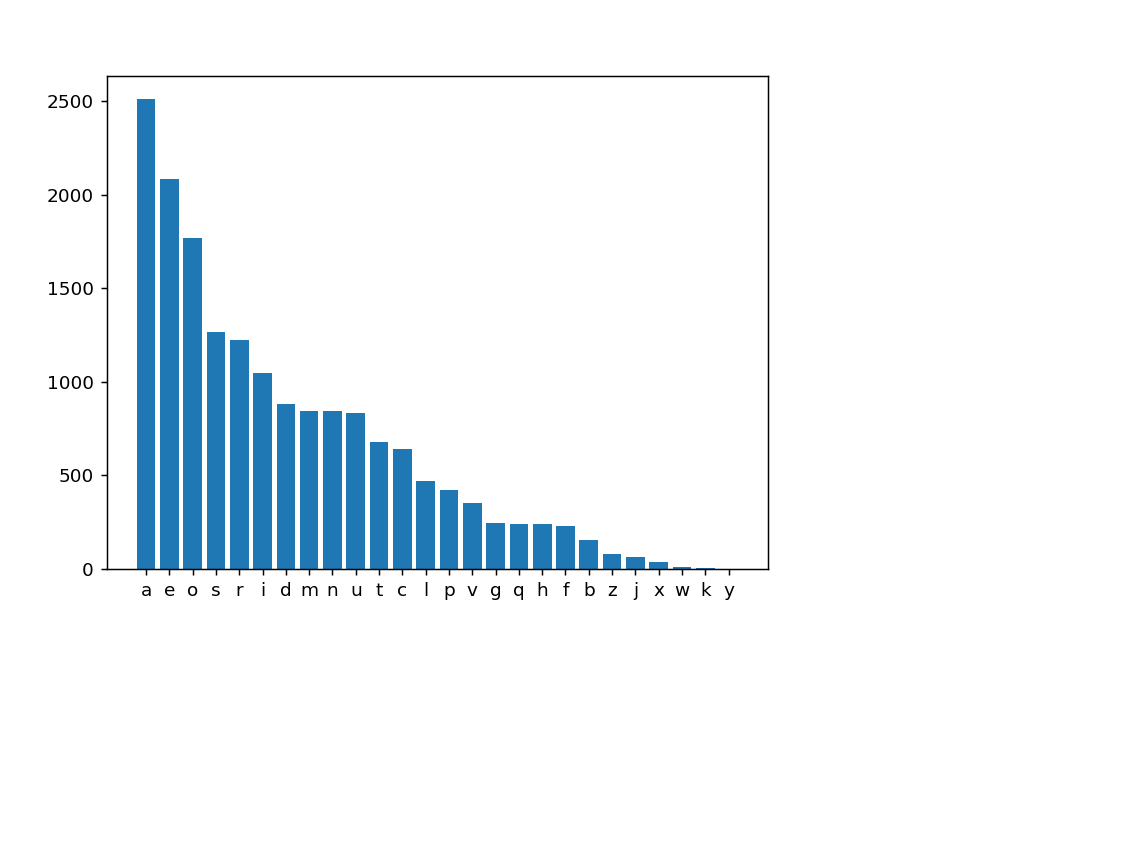

In [191]:
x = [i[0] for i in grupos_ordenados]
y = [i[1] for i in grupos_ordenados]

plt.figure()
plt.bar(x, y)
plt.show()

## Encapsulando o que temos até agora em funções


Para simplificar nossa vida podemos criar algumas funções para encapsular os códigos que escrevemos de maneira interativa até agora e tornar as coisas mais práticas.

In [192]:
def encripta(mensagem, codigo):
    return "".join(list(map(lambda x: codigo.get(x, x), mensagem)))

def desencripta(mensagem, codigo):
    # codigo2 é apenas o codigo invertido
    codigo2 = {valor:chave for chave, valor in codigo.items()}
    return encripta(mensagem, codigo2)

def calcula_histograma(texto):
    letras = list(string.ascii_lowercase)
    histogram = {letra:0 for letra in letras}
    
    for l in texto.lower():
        if l in histogram:  # Apenas conta letras já no dicionário -> vamos ignorar outros caracteres
            histogram[l] += 1
    
    grupos = [(i, histogram[i]) for i in letras]
    grupos_ordenados = list(reversed(sorted(grupos, key=lambda x: x[1])))
    
    x = [i[0] for i in grupos_ordenados]
    y = [i[1] for i in grupos_ordenados]
    return x, y

Podemos agora facilmente plotar o histograma dos texto conhecido e do texto encriptado.

<IPython.core.display.Javascript object>


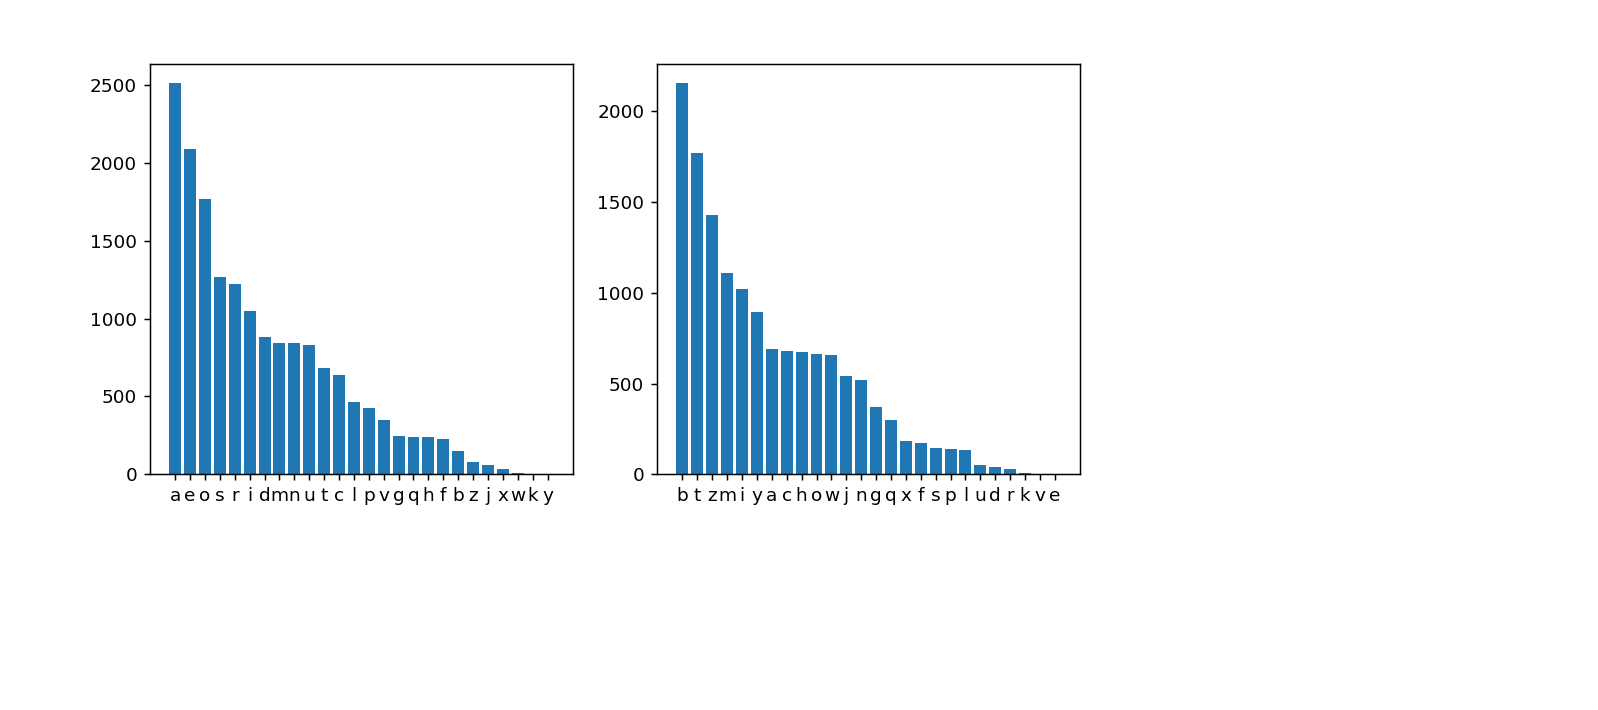

In [193]:
x1, y1 = calcula_histograma(texto_conhecido)

# Lê o texto encriptado
with open("a-cartomante-machado-de-assis-codificado.txt") as fid:
    texto_encriptado = fid.read()

x2, y2 = calcula_histograma(texto_encriptado)


fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].bar(x1, y1)
ax[1].bar(x2, y2)
plt.show()

# Descobrindo o código

Comparando os dois histogramas podemos ver que são bastante pareceidos, já que ambos foram computados de textos em  português. Como ambos os textos são longos, o histograma apresenta uma boa confiabilidade com relação a real distribuição no português. Dessa forma, obtemos dois histogramas com formas bastante semelhantes mesmo tendo sido computados de textos diferentes.


Um bom *chute* para o código então é mapear as letras no histograma da esquerda para as letras no histograma da direita.

In [194]:
# Cria o código usando informação dos histogramas
codigo_estimado = {i1:i2 for i1,i2 in zip(x1, x2)}
# Repete o código para letras maiúsculas
codigo_estimado.update({i1.upper():i2.upper() for i1,i2 in zip(x1, x2)})

print(codigo_estimado)


{'a': 'b', 'e': 't', 'o': 'z', 's': 'm', 'r': 'i', 'i': 'y', 'd': 'a', 'm': 'c', 'n': 'h', 'u': 'o', 't': 'w', 'c': 'j', 'l': 'n', 'p': 'g', 'v': 'q', 'g': 'x', 'q': 'f', 'h': 's', 'f': 'p', 'b': 'l', 'z': 'u', 'j': 'd', 'x': 'r', 'w': 'k', 'k': 'v', 'y': 'e', 'A': 'B', 'E': 'T', 'O': 'Z', 'S': 'M', 'R': 'I', 'I': 'Y', 'D': 'A', 'M': 'C', 'N': 'H', 'U': 'O', 'T': 'W', 'C': 'J', 'L': 'N', 'P': 'G', 'V': 'Q', 'G': 'X', 'Q': 'F', 'H': 'S', 'F': 'P', 'B': 'L', 'Z': 'U', 'J': 'D', 'X': 'R', 'W': 'K', 'K': 'V', 'Y': 'E'}


In [195]:
texto_desencriptado = desencripta(texto_encriptado, codigo_estimado)

print(texto_desencriptado[1000:1500])

oço Ladico, nmda sexua-feira te novedbro te 1869, hmanto esue ria teca,
por uer ito na véspera lonsmcuar mda laruodanue; a tiferença é hme o fazia
por omuras pacavras.
— Ria, ria. Os godens são assid; não alretiuad ed nata. Pois saiba hme
fmi, e hme eca ativingom o douivo ta lonsmcua, anues desdo hme em cge
tissesse o hme era. Apenas lodeçom a bouar as laruas, tisse-de: "A sengora
qosua te mda pessoa..." Lonfessei hme sid, e enuão eca lonuinmom a bouar as
laruas, lodbinom-as, e no fid telcarom-d


Como estamos tentando adivinhar o código, erros certamente ocorrem, já que existem letras com probabilidade semelhante em ambos os histogramas. Mas já é possível identificar algumas palavras na mensagem, mesmo escritas incorretamente. Podemos então corrigir os erros no código e repetir o processo de desencriptação para aperfeiçoar o código até que a mensagem seja corretamente decodificada.

A função `corrige_codigo` abaixo pode ser usada para tal.

In [196]:
def encontra_chave(codigo, valor_desejado):
    """Encontra a chave no dicionário `codigo` que leva a valor"""
    for chave, valor in codigo.items():
        if valor == valor_desejado:
            return chave

        
def muda_codigo(codigo, chave, valor):
    """Muda o valor para o qual a `chave` aponta no dicionário `codigo` para `valor`"""
    chave = chave.lower()
    valor = valor.lower()
    
    chave_errada = encontra_chave(codigo, valor)
    valor_errado = codigo[chave]
    
    codigo[chave] = valor
    codigo[chave_errada] = valor_errado
    
    # Faz o mesmo para letras maiúsculas
    codigo[chave.upper()] = valor.upper()
    codigo[chave_errada.upper()] = valor_errado.upper()
    
    
def corrige_codigo(codigo, desencriptado_errado, valor_correto):
    encriptado = encripta(desencriptado_errado, codigo)
    muda_codigo(codigo, valor_correto, encriptado)

Agora podemos corrigir o código.

In [224]:
corrige_codigo(codigo_estimado, 'u', 'i')

In [225]:
texto_desencriptado = desencripta(texto_encriptado, codigo_estimado)
print(texto_desencriptado[1980:2520])

ue era imprudente andar por essas casas. Vilela
podia sabê-lo, e depois...

— Qual saber! tive muita cautela, ao entrar na casa.
— Onde é a casa?
— Aqui perto, na Rua da Guarda Velha; não passava ninguém nessa
ocasião. Descansa; eu não sou maluca.
Camilo riu outra vez:
— Tu crês deveras nessas cousas? perguntou-lhe.
Foi então que ela, sem saber que traduzia Hamlet em vulgar, disse-lhe que
havia muita cousa misteriosa e verdadeira neste mundo. Se ele não
acreditava, paciência; mas o certo é que a cartomante adivinhara tudo. Que
mais? A


In [199]:
codigo_errado = {'a':'o', 'e':'i', 'i':'a','o':'u', 'u':'e'}

print("Desencriptou como: '{}'".format(desencripta("oi", codigo_errado)))
print("Devia ter desencriptado como: '{}'".format('eu'))

Desencriptou como: 'ae'
Devia ter desencriptado como: 'eu'


### DEBUG START

In [200]:
# corrige_codigo(codigo_errado, "a", "e")
# corrige_codigo(codigo_errado, "a", "u")
# desencripta("oi", codigo_errado)

In [201]:
encripta("a", codigo_errado)

'o'

In [202]:
muda_codigo(codigo_errado, 'e', 'o')

In [203]:
desencripta("oi", codigo_errado)

'ea'

In [204]:
encripta("a", codigo_errado)

'i'

In [205]:
muda_codigo(codigo_errado, "u", "i")

desencripta("oi", codigo_errado)

'eu'

### DEBUG END